In [1]:
import json
import os

In [2]:
dataDir = r"C:\Users\sachin\Desktop\mtp\sachin\data"

In [3]:
dataset = "Tweets-T"

In [4]:
true_c=[None]*120000

In [5]:
 with open(os.path.join(dataDir,dataset)) as input:
        line = input.readline()
        k=0
        while line:
            k=k+1
            obj = json.loads(line)
            text = obj['textCleaned']
            true_c[int(obj['Id'])]=obj['clusterNo']
            
            #print( obj['Id']+ "   " +text)
            #words_csv[k]=text
            line = input.readline()
            if ("" == line):break;

In [6]:
true_c

[None,
 9,
 23,
 27,
 9,
 3,
 10,
 9,
 1,
 23,
 20,
 24,
 30,
 4,
 24,
 10,
 26,
 12,
 23,
 7,
 4,
 22,
 21,
 29,
 31,
 7,
 9,
 20,
 8,
 21,
 7,
 9,
 22,
 19,
 26,
 25,
 29,
 27,
 9,
 29,
 14,
 10,
 7,
 29,
 7,
 30,
 7,
 4,
 14,
 4,
 23,
 1,
 13,
 8,
 14,
 4,
 4,
 26,
 32,
 14,
 9,
 22,
 7,
 4,
 8,
 30,
 26,
 27,
 14,
 5,
 22,
 7,
 24,
 7,
 8,
 13,
 15,
 5,
 14,
 24,
 21,
 4,
 20,
 9,
 1,
 22,
 3,
 7,
 20,
 20,
 26,
 29,
 17,
 4,
 22,
 20,
 18,
 19,
 4,
 9,
 29,
 22,
 5,
 25,
 29,
 20,
 27,
 21,
 24,
 1,
 21,
 17,
 8,
 17,
 4,
 7,
 32,
 22,
 26,
 7,
 21,
 23,
 27,
 27,
 4,
 7,
 11,
 8,
 7,
 4,
 26,
 22,
 22,
 20,
 22,
 30,
 29,
 9,
 24,
 26,
 26,
 23,
 7,
 25,
 2,
 4,
 21,
 14,
 8,
 7,
 29,
 7,
 4,
 20,
 13,
 4,
 26,
 21,
 6,
 30,
 19,
 19,
 14,
 14,
 24,
 14,
 14,
 14,
 30,
 28,
 25,
 8,
 22,
 29,
 20,
 20,
 22,
 23,
 20,
 9,
 10,
 14,
 6,
 21,
 24,
 17,
 22,
 4,
 20,
 29,
 21,
 26,
 30,
 24,
 30,
 26,
 22,
 23,
 20,
 20,
 1,
 17,
 7,
 10,
 30,
 7,
 21,
 4,
 22,
 22,
 30,
 14,
 29,
 2

In [7]:
def b_num(file_name):
    s=len(file_name)
    ans=0
    if(file_name[s-2]>'0' and file_name[s-2]<='9' ):
        ans=int(file_name[s-2])*10 +int(file_name[s-1])
        return ans
    return int(file_name[s-1])

In [8]:
import os
import re
from sklearn import metrics
from statistics import mean
a=[]
b=[]
t_a=[]
t_b=[]
ans=[]
g_nmi_M=[None] *16
g_complete_score_M=[None]*16
g_homogenity_M=[None]*16
di = r"C:\Users\sachin\Desktop\mtp\sachin\result"
i=0

for filename in os.listdir(di):
    #print(filename)
    
    
    temp=di+"/" + filename + "/Tweets-TSampleNo1ClusteringResult.txt"
  #  print(temp)
    file1=open(temp,"r")
    #print(file1)

    lines = file1.readlines()
    
    for line in lines:
        line = line.strip()

        arr = re.split(" ", line)
        t_a.append(true_c[int(arr[0])])
        t_b.append(arr[1])
        a.append(true_c[int(arr[0])])
        b.append(arr[1])
    nmi_score = metrics.normalized_mutual_info_score(a, b)  
    ans.append(nmi_score)
    k=b_num(filename)
    #print(k)
    #g_complete_score_M[k]=
    g_nmi_M[k-1]=nmi_score
    #g_nmi_M.append(nmi_score)
    print(nmi_score)
    score=metrics.completeness_score(a, b)
    #print ("completeness_score-whole-data:   %0.8f" % score)
    g_complete_score_M[k-1]=score
    score = metrics.homogeneity_score(a, b)
    g_homogenity_M[k-1]=score
    
    
    a.clear()
    b.clear()
nmi_score = metrics.normalized_mutual_info_score(t_a, t_b)
complete_score=metrics.completeness_score(t_a, t_b)
print("total_complete",+complete_score)
print("total",+ nmi_score)   
print("mean",+mean(ans))
    

0.8429531364466163
0.9461535983777408
0.9220860938409925
0.8366196381393723
0.8582676065960377
0.740675360004059
0.7086088917145754
0.5979777228876362
0.7994429041181178
0.8156178562975993
0.8237072967864693
0.8046056320820889
0.8041814803600968
0.8800391091803376
0.8785956849330395
0.8831088429346386
total_complete 0.8275666857326102
total 0.8286625061534048
mean 0.8214150534187137


In [9]:
g_nmi_M

[0.8429531364466163,
 0.7994429041181178,
 0.8156178562975993,
 0.8237072967864693,
 0.8046056320820889,
 0.8041814803600968,
 0.8800391091803376,
 0.8785956849330395,
 0.8831088429346386,
 0.9461535983777408,
 0.9220860938409925,
 0.8366196381393723,
 0.8582676065960377,
 0.740675360004059,
 0.7086088917145754,
 0.5979777228876362]

In [14]:
import os
import re
from sklearn import metrics
from statistics import mean
a=[]
b=[]
t_a=[]
t_b=[]
ans=[]
g_nmi_MF=[None] *16
g_complete_score_MF=[None]*16
g_homogenity_MF=[None]*16

di = r"C:\Users\sachin\Desktop\mtp\sachin\result"
i=0

for filename in os.listdir(di):
    #print(filename)
    temp=di+'/'+filename+"/Tweets-TSampleNo1ClusteringResult.txt"
  #  print(temp)
    file1=open(temp,"r")
    #print(file1)
    lines = file1.readlines()
    for line in lines:
        line = line.strip()

        arr = re.split(" ", line)
        t_a.append(true_c[int(arr[0])])
        t_b.append(arr[1])
        a.append(true_c[int(arr[0])])
        b.append(arr[1])
    nmi_score = metrics.normalized_mutual_info_score(a, b)  
    ans.append(nmi_score)
    #g_nmi_MF.append(nmi_score)
    k=b_num(filename)
    #print(k)
    g_nmi_MF[k-1]=nmi_score
    print(nmi_score)
    score=metrics.completeness_score(a, b)
    g_complete_score_MF[k-1]=score
    score = metrics.homogeneity_score(a, b)
    g_homogenity_MF[k-1]=score
    
    a.clear()
    b.clear()
nmi_score = metrics.normalized_mutual_info_score(t_a, t_b)  
complete_score=metrics.completeness_score(t_a, t_b)
print("total_complete",+complete_score)
print("total",+ nmi_score)   
print(mean(ans))
    

0.8491569220219628
0.9616412194190922
0.8813805619430163
0.9408695381734671
0.8913929292506193
0.8578063029589249
0.7754538508208046
0.627014802988978
0.8055916256748079
0.8366294236881894
0.8255352916085382
0.8299311635193237
0.8805674538687048
0.9338571650070233
0.894447298421762
0.9286190514827817
total_complete 0.8864199754525428
total 0.8783079817670273
0.8574934125529998


In [15]:
g_complete_score_MF

[0.7643243678903586,
 0.7202887771093839,
 0.7627438487383512,
 0.7770283787278665,
 0.7779305877568692,
 0.7970600876923637,
 0.9366618934490302,
 0.8599607206136077,
 0.890632824216821,
 0.9625882188581493,
 0.8461079369079985,
 0.9046643296463606,
 0.8520191897475144,
 0.799741117350564,
 0.6996822749371704,
 0.47497325181056743]

In [16]:
g_nmi_MF


[0.8491569220219628,
 0.8055916256748079,
 0.8366294236881894,
 0.8255352916085382,
 0.8299311635193237,
 0.8805674538687048,
 0.9338571650070233,
 0.894447298421762,
 0.9286190514827817,
 0.9616412194190922,
 0.8813805619430163,
 0.9408695381734671,
 0.8913929292506193,
 0.8578063029589249,
 0.7754538508208046,
 0.627014802988978]

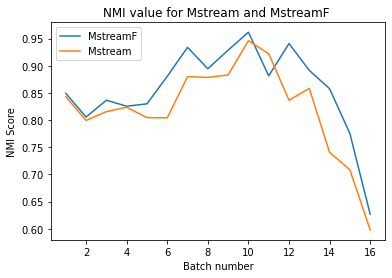

In [17]:
import matplotlib.pyplot as plt 

  
g_x=[]
for i in range(1,17):
    g_x.append(i)


# plotting the line 1 points  
 

plt.plot(g_x, g_nmi_MF, label = "MstreamF") 
plt.plot(g_x,g_nmi_M , label = "Mstream")
  
# naming the x axis 
plt.xlabel('Batch number') 
# naming the y axis 
plt.ylabel('NMI Score') 
# giving a title to my graph 
plt.title('NMI value for Mstream and MstreamF ') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

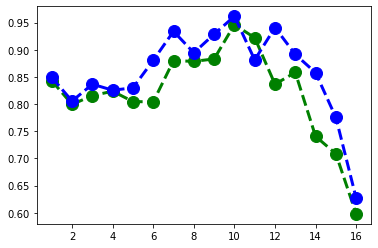

In [18]:
plt.plot(g_x, g_nmi_M, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='green', markersize=12,label='Mstream') 
plt.plot(g_x, g_nmi_MF, color='blue', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12,label='MstreamF') 


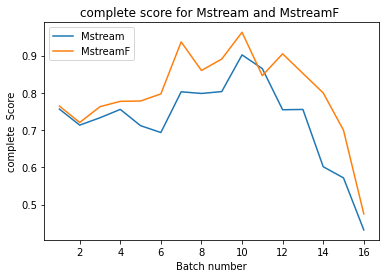

In [19]:


# plotting the line 1 points  
plt.plot(g_x,g_complete_score_M , label = "Mstream") 
  
plt.plot(g_x, g_complete_score_MF, label = "MstreamF") 
  
# naming the x axis 
plt.xlabel('Batch number') 
# naming the y axis 
plt.ylabel('complete  Score') 
# giving a title to my graph 
plt.title('complete score for Mstream and MstreamF ') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

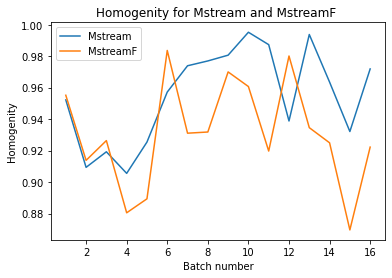

In [20]:


# plotting the line 1 points  
plt.plot(g_x,g_homogenity_M , label = "Mstream") 
  
plt.plot(g_x, g_homogenity_MF, label = "MstreamF") 
  
# naming the x axis 
plt.xlabel('Batch number') 
# naming the y axis 
plt.ylabel('Homogenity') 
# giving a title to my graph 
plt.title('Homogenity for Mstream and MstreamF ') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

In [47]:
def count_n0_topic(line):

    sub_str="Topic"
    if (line.find(sub_str) != -1): 
        return 1
    return 0

In [48]:
count_n0_topic("Toic Tpic")

0

In [ ]:
import os
import re
from sklearn import metrics
from statistics import mean
a=[]
b=[]
t_a=[]
t_b=[]
ans=[]
n_topic=0
g_nmi_M=[None] *16
g_complete_score_M=[None]*16
g_homogenity_M=[None]*16
g_no_of_clusters_M=[None]*16
di = r"C:\Users\sachin\Desktop\mtp\sachin\result"
i=0

for filename in os.listdir(di):
    #print(filename)
    
    
    temp=di+'/'+filename+"/Tweets-TSampleNo1PhiWordsInTopics.txt"
  #  print(temp)
    file1=open(temp,"r")
    #print(file1)

    lines = file1.readlines()
    n_topic=0
    for line in lines:
        n_topic=n_topic+count_n0_topic(line)
        #line = line.strip()


    k=b_num(filename)
    g_no_of_clusters_M[k-1]=n_topic
    
    #print(k)
    #g_complete_score_M[k]=
    #g_nmi_M[k-1]=nmi_score
    #g_nmi_M.append(nmi_score)
    #print(nmi_score)
    #score=metrics.completeness_score(a, b)
    #print ("completeness_score-whole-data:   %0.8f" % score)
    #g_complete_score_M[k-1]=score
    #score = metrics.homogeneity_score(a, b)
    #g_homogenity_M[k-1]=score
    
    
    #a.clear()
    #b.clear()
#nmi_score = metrics.normalized_mutual_info_score(t_a, t_b)  
#print("total",+ nmi_score)   
#print(mean(ans))
    

In [ ]:
g_no_of_clusters_M

[120, 141, 130, 106, 101, 100, 98, 87, 87, 82, 79, 86, 86, 80, 77, 75]

In [ ]:
import os
import re
from sklearn import metrics
from statistics import mean
a=[]
b=[]
t_a=[]
t_b=[]
ans=[]
n_topic=0
g_nmi_M=[None] *16
g_complete_score_M=[None]*16
g_homogenity_M=[None]*16
g_no_of_clusters_MF=[None]*16
di = r"C:\Users\sachin\Desktop\mtp\sachin\result"
i=0

for filename in os.listdir(di):
    #print(filename)
    
    
    temp=di+'/'+filename+"/Tweets-TSampleNo1PhiWordsInTopics.txt"
  #  print(temp)
    file1=open(temp,"r")
    #print(file1)

    lines = file1.readlines()
    n_topic=0
    for line in lines:
        n_topic=n_topic+count_n0_topic(line)
        #line = line.strip()


    k=b_num(filename)
    g_no_of_clusters_MF[k-1]=n_topic
    
    #print(k)
    #g_complete_score_M[k]=
    #g_nmi_M[k-1]=nmi_score
    #g_nmi_M.append(nmi_score)
    #print(nmi_score)
    #score=metrics.completeness_score(a, b)
    #print ("completeness_score-whole-data:   %0.8f" % score)
    #g_complete_score_M[k-1]=score
    #score = metrics.homogeneity_score(a, b)
    #g_homogenity_M[k-1]=score
    
    
    #a.clear()
    #b.clear()
#nmi_score = metrics.normalized_mutual_info_score(t_a, t_b)  
#print("total",+ nmi_score)   
#print(mean(ans))
    

In [ ]:
g_no_of_clusters_MF

[120, 145, 133, 103, 94, 91, 87, 84, 84, 83, 82, 90, 92, 83, 81, 82]

In [ ]:
g_no_of_clusters_M
g_no_of_clusters_MF
g_no_of_clusters_M_Tweets=[None]*16
g_no_of_clusters_MF_Tweets=[None]*16

g_no_of_clusters_M_News_T=[None]*16
g_no_of_clusters_MF_News_T=[None]*16

g_no_of_clusters_M_Tweets_T=[None]*16
g_no_of_clusters_MF_Tweets_T=[None]*16




In [ ]:
g_no_of_clusters_MU=[None]*16
g_no_of_clusters_MFU=[None]*16

In [ ]:
import os
import re
from sklearn import metrics
from statistics import mean
n_topic=0

g_no_of_clusters_MFU=[None]*16
di = r"C:\Users\sachin\Desktop\mtp\sachin\result"
i=0

for filename in os.listdir(di):
    #print(filename)
    
    
    temp=di+'/'+filename+"/Tweets-TSampleNo1PhiWordsInTopics.txt"
  #  print(temp)
    file1=open(temp,"r")
    #print(file1)

    lines = file1.readlines()
    n_topic=0
    for line in lines:
        n_topic=n_topic+count_n0_topic(line)
        #line = line.strip()


    k=b_num(filename)
    print(n_topic)
    g_no_of_clusters_MFU[k-1]=n_topic
    

121
91
92
89
87
81
84
86
149
126
109
97
94
95
85
89


In [ ]:
g_no_of_clusters_MF_Tweets

[135, 162, 140, 119, 104, 83, 79, 79, 87, 86, 75, 74, 93, 95, 81, 69]

In [ ]:
import os
import re
from sklearn import metrics
from statistics import mean
n_topic=0

g_no_of_clusters_MF=[None]*16
di = r"C:\Users\sachin\Desktop\mtp\sachin\result"
i=0

for filename in os.listdir(di):
    #print(filename)
    
    
    temp=di+'/'+filename+"/Tweets-TSampleNo1PhiWordsInTopics.txt"
  #  print(temp)
    file1=open(temp,"r")
    #print(file1)

    lines = file1.readlines()
    n_topic=0
    for line in lines:
        n_topic=n_topic+count_n0_topic(line)
        #line = line.strip()


    k=b_num(filename)
    g_no_of_clusters_MF[k-1]=n_topic
    

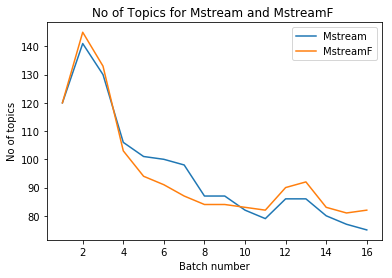

In [ ]:
# plotting the line 1 points  
plt.plot(g_x,g_no_of_clusters_M, label = "Mstream") 
  
plt.plot(g_x, g_no_of_clusters_MF, label = "MstreamF") 
  
# naming the x axis 
plt.xlabel('Batch number') 
# naming the y axis 
plt.ylabel('No of topics') 
# giving a title to my graph 
plt.title('No of Topics for Mstream and MstreamF ') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

In [ ]:
import os
import re
from sklearn import metrics
from statistics import mean
a=[]
b=[]
t_a=[]
t_b=[]
ans=[]
g_nmi_M=[None] *16
g_complete_score_M=[None]*16
g_homogenity_M=[None]*16
di = r"C:\Users\sachin\Desktop\mtp\sachin\result"
i=0

for filename in os.listdir(di):
    #print(filename)
    
    
    temp=di+'/'+filename+"/Tweets-TSampleNo1ClusteringResult.txt"
  #  print(temp)
    file1=open(temp,"r")
    #print(file1)

    lines = file1.readlines()
    
    for line in lines:
        line = line.strip()

        arr = re.split(" ", line)
        
        t_a.append(true_c[int(arr[0])])
        t_b.append(arr[1])
        #print(arr[0])
        
        a.append(true_c[int(arr[0])])
        b.append(arr[1])
    nmi_score = metrics.normalized_mutual_info_score(a, b)  
    ans.append(nmi_score)
    k=b_num(filename)
    g_nmi_M[k-1]=nmi_score
    print(nmi_score)
    
    
    a.clear()
    b.clear()
nmi_score = metrics.normalized_mutual_info_score(t_a, t_b)  
print("total",+ nmi_score)   
print(mean(ans))
    

0.8813677236956667
0.8645811287446801
0.8646512852838539
0.8505622444461114
0.8476454606247338
0.860009465339455
0.8565032863523394
0.8571429642559912
0.8873979427023875
0.9002884554345837
0.8867921242764558
0.8819692379572359
0.8848114728812232
0.8758605033215777
0.8770681527746912
0.8539860125288434
total 0.7706562932532953
0.8706648412887393


In [ ]:
import os
import re
from sklearn import metrics
from statistics import mean
a=[]
b=[]
t_a=[]
t_b=[]
ans=[]
g_nmi_M=[None] *16
g_complete_score_M=[None]*16
g_homogenity_M=[None]*16
di = r"C:\Users\sachin\Desktop\mtp\sachin\result"
i=0

for filename in os.listdir(di):
    #print(filename)
    
    
    temp=di+'/'+filename+"/Tweets-TSampleNo1ClusteringResult.txt"
  #  print(temp)
    file1=open(temp,"r")
    #print(file1)

    lines = file1.readlines()
    
    for line in lines:
        line = line.strip()

        arr = re.split(" ", line)
        t_a.append(true_c[int(arr[0])])
        t_b.append(arr[1])
        a.append(true_c[int(arr[0])])
        b.append(arr[1])
    nmi_score = metrics.normalized_mutual_info_score(a, b)  
    ans.append(nmi_score)
    k=b_num(filename)
    #print(k)
    #g_complete_score_M[k]=
    g_nmi_M[k-1]=nmi_score
    #g_nmi_M.append(nmi_score)
    print(nmi_score)
    score=metrics.completeness_score(a, b)
    #print ("completeness_score-whole-data:   %0.8f" % score)
    g_complete_score_M[k-1]=score
    score = metrics.homogeneity_score(a, b)
    g_homogenity_M[k-1]=score
    
    
    a.clear()
    b.clear()
nmi_score = metrics.normalized_mutual_info_score(t_a, t_b)
complete_score=metrics.completeness_score(t_a, t_b)
print("total_complete",+complete_score)
print("total",+ nmi_score)   
print("man ",+mean(ans))
    

0.8850590269114179
0.9080976351397656
0.9132877450948458
0.9071507739053895
0.9106049698392085
0.9191119162121257
0.9019646153474576
0.9118540118882216
0.9003355240778006
0.898814311781879
0.8995268853675344
0.8983521866974333
0.9133744633499989
0.9116610978974203
0.8921325729980465
0.9032403077024198
total_complete 0.8705762201787123
total 0.8555592946250863
man  0.9046605027631853


In [ ]:
import os
import re
from sklearn import metrics
from statistics import mean
a=[]
b=[]
t_a=[]
t_b=[]
ans=[]
g_nmi_M=[None] *16
g_complete_score_M=[None]*16
g_homogenity_M=[None]*16
di = r"C:\Users\sachin\Desktop\mtp\sachin\result"
i=0

for filename in os.listdir(di):
    #print(filename)
    
    
    temp=di+'/'+filename+"/Tweets-TSampleNo1ClusteringResult.txt"
  #  print(temp)
    file1=open(temp,"r")
    #print(file1)

    lines = file1.readlines()
    
    for line in lines:
        line = line.strip()

        arr = re.split(" ", line)
        t_a.append(true_c[int(arr[0])])
        t_b.append(arr[1])
        a.append(true_c[int(arr[0])])
        b.append(arr[1])
    nmi_score = metrics.normalized_mutual_info_score(a, b)  
    ans.append(nmi_score)
    k=b_num(filename)
    #print(k)
    #g_complete_score_M[k]=
    g_nmi_M[k-1]=nmi_score
    #g_nmi_M.append(nmi_score)
    print(nmi_score)
    score=metrics.completeness_score(a, b)
    #print ("completeness_score-whole-data:   %0.8f" % score)
    g_complete_score_M[k-1]=score
    score = metrics.homogeneity_score(a, b)
    g_homogenity_M[k-1]=score
    
    
    a.clear()
    b.clear()
nmi_score = metrics.normalized_mutual_info_score(t_a, t_b)
complete_score=metrics.completeness_score(t_a, t_b)
print("total_complete",+complete_score)
print("total",+ nmi_score)   
print("man ",+mean(ans))
    

0.8748951536839877
0.8781647761104063
0.88958205390797
0.8583203577059592
0.8590756596267112
0.864112644853381
0.8503752051477967
0.8612010718967794
0.8894968095028014
0.8935807226505753
0.8816641224425076
0.8671836207070686
0.8829721803594003
0.8804175315497814
0.8751858600836283
0.8622275691227584
total_complete 0.7780723425961005
total 0.7546633621801628
man  0.8730284587094695


In [ ]:
import os
import re
from sklearn import metrics
from statistics import mean
a=[]
b=[]
t_a=[]
t_b=[]
ans=[]
g_nmi_M_U=[None] *16
g_complete_score_M_U=[None]*16
g_homogenity_M=[None]*16
di = r"C:\Users\sachin\Desktop\mtp\sachin\result"
i=0

for filename in os.listdir(di):
    #print(filename)
    
    
    temp=di+'/'+filename+"/Tweets-TSampleNo1ClusteringResult.txt"
  #  print(temp)
    file1=open(temp,"r")
    #print(file1)

    lines = file1.readlines()
    
    for line in lines:
        line = line.strip()

        arr = re.split(" ", line)
        t_a.append(true_c[int(arr[0])])
        t_b.append(arr[1])
        a.append(true_c[int(arr[0])])
        b.append(arr[1])
    nmi_score = metrics.normalized_mutual_info_score(a, b)  
    ans.append(nmi_score)
    k=b_num(filename)
    #print(k)
    #g_complete_score_M[k]=
    g_nmi_M_U[k-1]=nmi_score
    #g_nmi_M.append(nmi_score)
    print(nmi_score)
    score=metrics.completeness_score(a, b)
    #print ("completeness_score-whole-data:   %0.8f" % score)
    g_complete_score_M_U[k-1]=score
    score = metrics.homogeneity_score(a, b)
    g_homogenity_M[k-1]=score
    
    
    a.clear()
    b.clear()
nmi_score = metrics.normalized_mutual_info_score(t_a, t_b)
complete_score=metrics.completeness_score(t_a, t_b)
print("total_complete",+complete_score)
print("total",+ nmi_score)   
print("man ",+mean(ans))
    

0.8835158406135555
0.9263155205488163
0.919443261761324
0.9224560086248441
0.914831420127409
0.9216898723235356
0.9140563236872742
0.9263210792146467
0.902975731840035
0.9113188172957601
0.8995782208941833
0.9040575756095235
0.9186779735218469
0.922314558737697
0.9130722426215276
0.9051269126625784
total_complete 0.8705082139844913
total 0.8624694891976324
man  0.9128594600052848


In [ ]:
g_nmi_M_U

[0.8835158406135555,
 0.902975731840035,
 0.9113188172957601,
 0.8995782208941833,
 0.9040575756095235,
 0.9186779735218469,
 0.922314558737697,
 0.9130722426215276,
 0.9051269126625784,
 0.9263155205488163,
 0.919443261761324,
 0.9224560086248441,
 0.914831420127409,
 0.9216898723235356,
 0.9140563236872742,
 0.9263210792146467]

In [ ]:
import os
import re
from sklearn import metrics
from statistics import mean
a=[]
b=[]
t_a=[]
t_b=[]
ans=[]
g_nmi_MF_U=[None] *16
g_complete_score_MF_U=[None]*16
g_homogenity_M=[None]*16
di = r"C:\Users\sachin\Desktop\mtp\sachin\result"
i=0

for filename in os.listdir(di):
    #print(filename)
    
    
    temp=di+'/'+filename+"/Tweets-TSampleNo1ClusteringResult.txt"
  #  print(temp)
    file1=open(temp,"r")
    #print(file1)

    lines = file1.readlines()
    
    for line in lines:
        line = line.strip()

        arr = re.split(" ", line)
        t_a.append(true_c[int(arr[0])])
        t_b.append(arr[1])
        a.append(true_c[int(arr[0])])
        b.append(arr[1])
    nmi_score = metrics.normalized_mutual_info_score(a, b)  
    ans.append(nmi_score)
    k=b_num(filename)
    #print(k)
    #g_complete_score_M[k]=
    g_nmi_MF_U[k-1]=nmi_score
    #g_nmi_M.append(nmi_score)
    print(nmi_score)
    score=metrics.completeness_score(a, b)
    #print ("completeness_score-whole-data:   %0.8f" % score)
    g_complete_score_MF_U[k-1]=score
    score = metrics.homogeneity_score(a, b)
    g_homogenity_M[k-1]=score
    
    
    a.clear()
    b.clear()
nmi_score = metrics.normalized_mutual_info_score(t_a, t_b)
complete_score=metrics.completeness_score(t_a, t_b)
print("total_complete",+complete_score)
print("total",+ nmi_score)   
print("man ",+mean(ans))
    

0.8697068919927012
0.8786192173677906
0.8749524230003124
0.8486870620359313
0.8595426271734138
0.8559836928193741
0.8355173137059644
0.8532790595823939
0.8815322604195543
0.9015524095500563
0.8851615007592035
0.8706680224712244
0.8817541213105277
0.8728587486922942
0.8724136730876563
0.8513571888658509
total_complete 0.7676420953911971
total 0.7454860693098053
man  0.8683491383021406


In [ ]:
g_nmi_MF_U

[0.8697068919927012,
 0.8815322604195543,
 0.9015524095500563,
 0.8851615007592035,
 0.8706680224712244,
 0.8817541213105277,
 0.8728587486922942,
 0.8724136730876563,
 0.8513571888658509,
 0.8786192173677906,
 0.8749524230003124,
 0.8486870620359313,
 0.8595426271734138,
 0.8559836928193741,
 0.8355173137059644,
 0.8532790595823939]

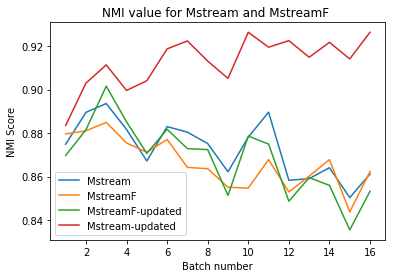

In [ ]:
import matplotlib.pyplot as plt 

  
g_x=[]
for i in range(1,17):
    g_x.append(i)


# plotting the line 1 points  
plt.plot(g_x,g_nmi_M , label = "Mstream") 
  
plt.plot(g_x, g_nmi_MF, label = "MstreamF") 

plt.plot(g_x, g_nmi_MF_U, label = "MstreamF-updated") 

plt.plot(g_x, g_nmi_M_U, label = "Mstream-updated") 

# naming the x axis 
plt.xlabel('Batch number') 
# naming the y axis 
plt.ylabel('NMI Score') 
# giving a title to my graph 
plt.title('NMI value for Mstream and MstreamF ') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

In [ ]:
import os
import re
from sklearn import metrics
from statistics import mean
a=[]
b=[]
t_a=[]
t_b=[]
ans=[]
g_nmi_M=[None] *16
g_complete_score_M=[None]*16
g_homogenity_M=[None]*16
di = r"C:\Users\sachin\Desktop\mtp\sachin\result"
i=0

for filename in os.listdir(di):
    #print(filename)
    
    
    temp=di+'/'+filename+"/Tweets-TSampleNo1ClusteringResult.txt"
  #  print(temp)
    file1=open(temp,"r")
    #print(file1)

    lines = file1.readlines()
    
    for line in lines:
        line = line.strip()

        arr = re.split(" ", line)
        t_a.append(true_c[int(arr[0])])
        t_b.append(arr[1])
        a.append(true_c[int(arr[0])])
        b.append(arr[1])
    nmi_score = metrics.normalized_mutual_info_score(a, b)  
    ans.append(nmi_score)
    k=b_num(filename)
    #print(k)
    #g_complete_score_M[k]=
    g_nmi_M[k-1]=nmi_score
    #g_nmi_M.append(nmi_score)
    print(nmi_score)
    score=metrics.completeness_score(a, b)
    #print ("completeness_score-whole-data:   %0.8f" % score)
    g_complete_score_M[k-1]=score
    score = metrics.homogeneity_score(a, b)
    g_homogenity_M[k-1]=score
    
    
    a.clear()
    b.clear()
nmi_score = metrics.normalized_mutual_info_score(t_a, t_b)
complete_score=metrics.completeness_score(t_a, t_b)
print("total_complete",+complete_score)
print("total",+ nmi_score)   
print("mean",+mean(ans))
    

0.8813677236956667
0.8645811287446801
0.8646512852838539
0.8505622444461114
0.8476454606247338
0.860009465339455
0.8565032863523394
0.8571429642559912
0.8873979427023875
0.9002884554345837
0.8867921242764558
0.8819692379572359
0.8848114728812232
0.8758605033215777
0.8770681527746912
0.8539860125288434
total_complete 0.8005572644315639
total 0.7706562932532953
mean 0.8706648412887393


In [ ]:
dataset = "Tweets"

In [ ]:
true_c=[None]*32000

In [ ]:
 with open(dataDir + dataset) as input:
        line = input.readline()
        k=0
        while line:
            k=k+1
            obj = json.loads(line)
            text = obj['textCleaned']
            true_c[int(obj['Id'])]=obj['clusterNo']
            
            #print( obj['Id']+ "   " +text)
            #words_csv[k]=text
            line = input.readline()
            if ("" == line):break;

In [ ]:
import os
import re
from sklearn import metrics
from statistics import mean
a=[]
b=[]
t_a=[]
t_b=[]
ans=[]
g_nmi_M_tweet=[None] *16
g_complete_score_M=[None]*16
g_homogenity_M=[None]*16
di = r"C:\Users\sachin\Desktop\mtp\sachin\result"
i=0

for filename in os.listdir(di):
    #print(filename)
    
    
    temp=di+'/'+filename+"/Tweets-TSampleNo1ClusteringResult.txt"
  #  print(temp)
    file1=open(temp,"r")
    #print(file1)

    lines = file1.readlines()
    
    for line in lines:
        line = line.strip()

        arr = re.split(" ", line)
        t_a.append(true_c[int(arr[0])])
        t_b.append(arr[1])
        a.append(true_c[int(arr[0])])
        b.append(arr[1])
    nmi_score = metrics.normalized_mutual_info_score(a, b)  
    ans.append(nmi_score)
    k=b_num(filename)
    #print(k)
    #g_complete_score_M[k]=
    g_nmi_M_tweet[k-1]=nmi_score
    print(g_nmi_M_tweet[k-1])
    #g_nmi_M.append(nmi_score)
    print(nmi_score)
    score=metrics.completeness_score(a, b)
    #print ("completeness_score-whole-data:   %0.8f" % score)
    g_complete_score_M[k-1]=score
    score = metrics.homogeneity_score(a, b)
    g_homogenity_M[k-1]=score
    
    
    a.clear()
    b.clear()
nmi_score = metrics.normalized_mutual_info_score(t_a, t_b)
complete_score=metrics.completeness_score(t_a, t_b)
print("total_complete",+complete_score)
print("total",+ nmi_score)   
print("mean",+mean(ans))
    

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/uday/Desktop/result/Mstream_Tweets'

In [ ]:
g_nmi_M_tweet

[0.7190411714246504,
 0.7644787452805539,
 0.8474189868112146,
 0.74500573947838,
 0.8480025683675478,
 0.7694494348977625,
 0.8902750535207444,
 0.9316686241135245,
 0.9253583194098068,
 0.8312578331056938,
 0.7925849811435614,
 0.7224911135794324,
 0.7840665010900121,
 0.9423953158542754,
 0.7649797475291839,
 0.8871118347078814]

In [ ]:
import os
import re
from sklearn import metrics
from statistics import mean
a=[]
b=[]
t_a=[]
t_b=[]
ans=[]
g_nmi_MF_tweet=[None] *16
g_complete_score_M=[None]*16
g_homogenity_M=[None]*16
di = r"C:\Users\sachin\Desktop\mtp\sachin\result"
i=0

for filename in os.listdir(di):
    #print(filename)
    
    
    temp=di+'/'+filename+"/Tweets-TSampleNo1ClusteringResult.txt"
  #  print(temp)
    file1=open(temp,"r")
    #print(file1)

    lines = file1.readlines()
    
    for line in lines:
        line = line.strip()

        arr = re.split(" ", line)
        t_a.append(true_c[int(arr[0])])
        t_b.append(arr[1])
        a.append(true_c[int(arr[0])])
        b.append(arr[1])
    nmi_score = metrics.normalized_mutual_info_score(a, b)  
    ans.append(nmi_score)
    k=b_num(filename)
    #print(k)
    #g_complete_score_M[k]=
    g_nmi_MF_tweet[k-1]=nmi_score
    #g_nmi_M.append(nmi_score)
    print(nmi_score)
    score=metrics.completeness_score(a, b)
    #print ("completeness_score-whole-data:   %0.8f" % score)
    g_complete_score_M[k-1]=score
    score = metrics.homogeneity_score(a, b)
    g_homogenity_M[k-1]=score
    
    
    a.clear()
    b.clear()
nmi_score = metrics.normalized_mutual_info_score(t_a, t_b)
complete_score=metrics.completeness_score(t_a, t_b)
print("total_complete",+complete_score)
print("total",+ nmi_score)   
print("mean",+mean(ans))
    

0.7178153268337885
0.836965298905647
0.7548051277761072
0.7656513120826343
0.7832478196707148
0.9056536338418367
0.7754848138441245
0.8641282611916778
0.7604154751247336
0.8778668325710813
0.8096730000021538
0.8810442136444354
0.8312702637759796
0.8890741928717664
0.9387352256848187
0.9355108048984274
total_complete 0.8697741108683188
total 0.8731899024973334
mean 0.8329588501699954


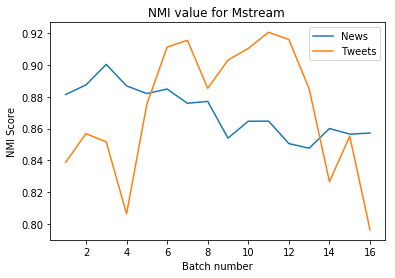

In [ ]:
import matplotlib.pyplot as plt 

  
g_x=[]
for i in range(1,17):
    g_x.append(i)


# plotting the line 1 points  
plt.plot(g_x,g_nmi_M , label = "News") 
  
plt.plot(g_x, g_nmi_M_tweet, label = "Tweets") 



# naming the x axis 
plt.xlabel('Batch number') 
# naming the y axis 
plt.ylabel('NMI Score') 
# giving a title to my graph 
plt.title('NMI value for Mstream ') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

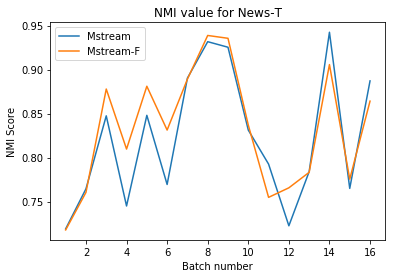

In [ ]:
import matplotlib.pyplot as plt 

  
g_x=[]
for i in range(1,17):
    g_x.append(i)


# plotting the line 1 points  
plt.plot(g_x,g_nmi_M_tweet , label = "Mstream") 
  
plt.plot(g_x, g_nmi_MF_tweet, label = "Mstream-F") 



# naming the x axis 
plt.xlabel('Batch number') 
# naming the y axis 
plt.ylabel('NMI Score') 
# giving a title to my graph 
plt.title('NMI value for News-T') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

In [ ]:
tweets_mf_tweets_t

[0.8595034300677995,
 0.8144874351566418,
 0.808996022180374,
 0.8075288492314363,
 0.8383450061638418,
 0.8792186913225698,
 0.8732994196783197,
 0.9439591269341051,
 0.9039777885916018,
 0.9220617865181757,
 0.9664592622123215,
 0.918625850061983,
 0.9251417138738613,
 0.8563764794834829,
 0.7827990915081474,
 0.654914552825251]

In [ ]:
tweets_mf_News_t=[]
tweets_mf_News_t=g_nmi_MF_tweet

In [ ]:
tweets_mf_News_t

[0.7178153268337885,
 0.7604154751247336,
 0.8778668325710813,
 0.8096730000021538,
 0.8810442136444354,
 0.8312702637759796,
 0.8890741928717664,
 0.9387352256848187,
 0.9355108048984274,
 0.836965298905647,
 0.7548051277761072,
 0.7656513120826343,
 0.7832478196707148,
 0.9056536338418367,
 0.7754848138441245,
 0.8641282611916778]

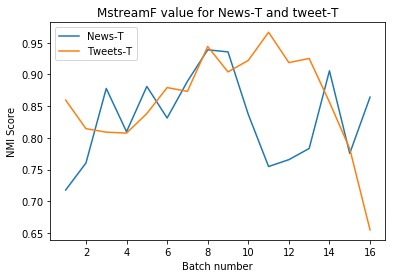

In [ ]:
import matplotlib.pyplot as plt 

  
g_x=[]
for i in range(1,17):
    g_x.append(i)


# plotting the line 1 points  
plt.plot(g_x,tweets_mf_News_t , label = "News-T") 
  
plt.plot(g_x, tweets_mf_tweets_t, label = "Tweets-T") 



# naming the x axis 
plt.xlabel('Batch number') 
# naming the y axis 
plt.ylabel('NMI Score') 
# giving a title to my graph 
plt.title('MstreamF value for News-T and tweet-T') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

In [ ]:
g_no_of_clusters_M
g_no_of_clusters_MF
g_no_of_clusters_M_Tweets
g_no_of_clusters_MF_Tweets

g_no_of_clusters_M_News_T
g_no_of_clusters_MF_News_T

g_no_of_clusters_M_Tweets_T
g_no_of_clusters_MF_Tweets_T

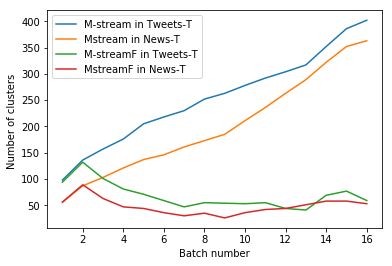

In [ ]:
import matplotlib.pyplot as plt 

  
g_x=[]
for i in range(1,17):
    g_x.append(i)


# plotting the line 1 points  
plt.plot(g_x, g_no_of_clusters_M_Tweets_T, label = "M-stream in Tweets-T") 
plt.plot(g_x,g_no_of_clusters_M_News_T , label = "Mstream in News-T") 
  

plt.plot(g_x, g_no_of_clusters_MF_Tweets_T, label = "M-streamF in Tweets-T") 
plt.plot(g_x, g_no_of_clusters_MF_News_T, label = "MstreamF in News-T") 



# naming the x axis 
plt.xlabel('Batch number') 
# naming the y axis 
plt.ylabel('Number of clusters ') 
# giving a title to my graph 
#plt.title('MstreamF value for News-T and tweet-T') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

In [ ]:
g_no_of_clusters_M_Tweets_T

[94, 132, 101, 81, 71, 59, 47, 55, 54, 53, 55, 44, 41, 69, 77, 59]

In [ ]:
g_no_of_clusters_M_News_T

[56, 87, 103, 121, 137, 146, 161, 173, 185, 211, 236, 263, 289, 322, 352, 363]

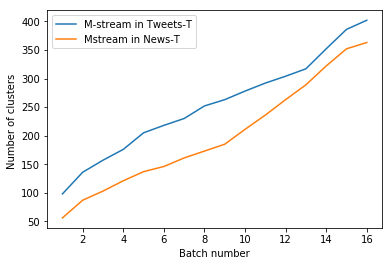

In [ ]:
import matplotlib.pyplot as plt 

  
g_x=[]
for i in range(1,17):
    g_x.append(i)


# plotting the line 1 points  
plt.plot(g_x, g_no_of_clusters_M_Tweets_T, label = "M-stream in Tweets-T") 
plt.plot(g_x,g_no_of_clusters_M_News_T , label = "Mstream in News-T") 
  

#plt.plot(g_x, g_no_of_clusters_MF_Tweets_T, label = "M-streamF in Tweets-T") 
#plt.plot(g_x, g_no_of_clusters_MF_News_T, label = "MstreamF in News-T") 



# naming the x axis 
plt.xlabel('Batch number') 
# naming the y axis 
plt.ylabel('Number of clusters ') 
# giving a title to my graph 
#plt.title('MstreamF value for News-T and tweet-T') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

In [ ]:
g_no_of_clusters_MF_Tweets_T

[94, 132, 101, 81, 71, 59, 47, 55, 54, 53, 55, 44, 41, 69, 77, 59]

In [ ]:
g_no_of_clusters_M_Tweets_T

[94, 132, 101, 81, 71, 59, 47, 55, 54, 53, 55, 44, 41, 69, 77, 59]

In [ ]:
g_no_of_clusters_MU
g_no_of_clusters_MFU

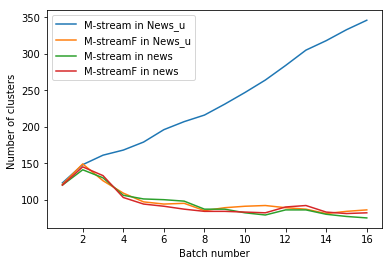

In [ ]:
import matplotlib.pyplot as plt 

  
g_x=[]
for i in range(1,17):
    g_x.append(i)


# plotting the line 1 points  
plt.plot(g_x, g_no_of_clusters_MU, label = "M-stream in News_u") 
plt.plot(g_x, g_no_of_clusters_MFU, label = "M-streamF in News_u") 
plt.plot(g_x, g_no_of_clusters_M, label = "M-stream in news") 
plt.plot(g_x, g_no_of_clusters_MF, label = "M-streamF in news") 



# naming the x axis 
plt.xlabel('Batch number') 
# naming the y axis 
plt.ylabel('Number of clusters ') 
# giving a title to my graph 
#plt.title('MstreamF value for News-T and tweet-T') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

In [ ]:
g_no_of_clusters_MF


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]